In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sb

import warnings
from collections import Counter
import datetime

#import wordcloud
import json

In [2]:
df = pd.read_csv("US_youtube_trending_data.csv")

In [3]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sb.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [4]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120791 entries, 0 to 120790
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           120791 non-null  object
 1   title              120791 non-null  object
 2   publishedAt        120791 non-null  object
 3   channelId          120791 non-null  object
 4   channelTitle       120791 non-null  object
 5   categoryId         120791 non-null  int64 
 6   trending_date      120791 non-null  object
 7   tags               120791 non-null  object
 8   view_count         120791 non-null  int64 
 9   likes              120791 non-null  int64 
 10  dislikes           120791 non-null  int64 
 11  comment_count      120791 non-null  int64 
 12  thumbnail_link     120791 non-null  object
 13  comments_disabled  120791 non-null  bool  
 14  ratings_disabled   120791 non-null  bool  
 15  description        117339 non-null  object
dtypes: bool(2), int64(5)

# DATA PREPARTION

Seperation of dataset to non numeric and numeric
- Remove the non 2021 year data.
- Remove Unwanted columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120791 entries, 0 to 120790
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           120791 non-null  object
 1   title              120791 non-null  object
 2   publishedAt        120791 non-null  object
 3   channelId          120791 non-null  object
 4   channelTitle       120791 non-null  object
 5   categoryId         120791 non-null  int64 
 6   trending_date      120791 non-null  object
 7   tags               120791 non-null  object
 8   view_count         120791 non-null  int64 
 9   likes              120791 non-null  int64 
 10  dislikes           120791 non-null  int64 
 11  comment_count      120791 non-null  int64 
 12  thumbnail_link     120791 non-null  object
 13  comments_disabled  120791 non-null  bool  
 14  ratings_disabled   120791 non-null  bool  
 15  description        117339 non-null  object
dtypes: bool(2), int64(5)

In [7]:
df = df[df["publishedAt"].str.contains("2020|2022") == False]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74225 entries, 27796 to 103589
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           74225 non-null  object
 1   title              74225 non-null  object
 2   publishedAt        74225 non-null  object
 3   channelId          74225 non-null  object
 4   channelTitle       74225 non-null  object
 5   categoryId         74225 non-null  int64 
 6   trending_date      74225 non-null  object
 7   tags               74225 non-null  object
 8   view_count         74225 non-null  int64 
 9   likes              74225 non-null  int64 
 10  dislikes           74225 non-null  int64 
 11  comment_count      74225 non-null  int64 
 12  thumbnail_link     74225 non-null  object
 13  comments_disabled  74225 non-null  bool  
 14  ratings_disabled   74225 non-null  bool  
 15  description        72363 non-null  object
dtypes: bool(2), int64(5), object(9)
mem

## To Check if Data only consist of 2021 published videos (74225)

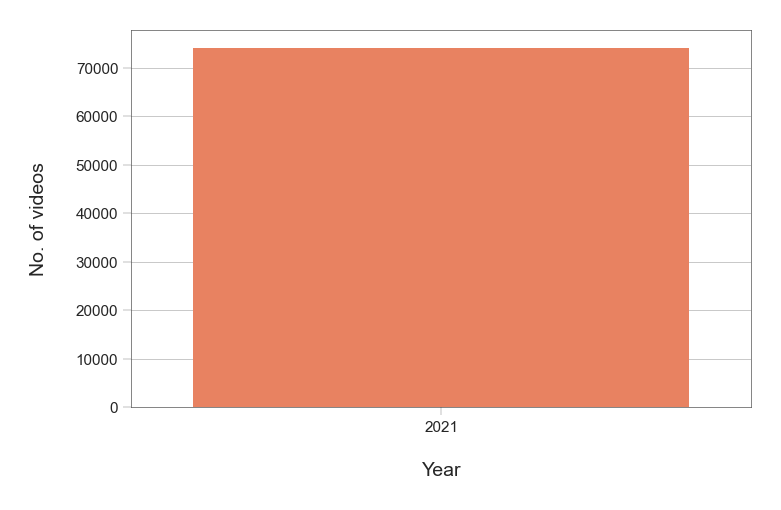

In [9]:
cdf = df["publishedAt"].apply(lambda x: '' + x[:4]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "publishedAt": "No_of_videos"})

fig, ax = plt.subplots()
_ = sb.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sb.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [10]:
df["publishedAt"].apply(lambda x: '' + x[:4]).value_counts(normalize=True)
df["trending_date"].apply(lambda x: '' + x[:4]).value_counts(normalize=True)


2021   0.99
2022   0.01
Name: trending_date, dtype: float64

In [11]:
df.drop(['channelId', 'video_id','thumbnail_link'], axis=1)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
27796,"Youtube Rewind 2020, Thank God It's Over",2021-01-01T21:00:03Z,MrBeast,24,2021-01-02T00:00:00Z,[None],17866867,2862697,19927,224811,False,False,This is what Youtube Rewind would look like if...
27797,Justin Bieber - Anyone,2021-01-01T05:00:08Z,JustinBieberVEVO,10,2021-01-02T00:00:00Z,Justin|Bieber|Anyone|RBMG/Def|Jam|Pop,11013551,782233,21750,63315,False,False,Anyone out now: https://JustinBieber.lnk.to/An...
27798,Jennifer Lopez | New Year's Rockin' Eve Perfor...,2021-01-01T09:00:37Z,Jennifer Lopez,10,2021-01-02T00:00:00Z,[None],2060520,34996,6049,5788,False,False,Jennifer Lopez | New Year's Rockin' Eve Perfor...
27799,London's 2021 fireworks 🎆 Happy New Year Live!...,2021-01-01T00:13:16Z,BBC,24,2021-01-02T00:00:00Z,fireworks|NYE|new year countdown 2021|firework...,5478680,85416,9242,16876,False,False,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...
27802,Welcome to BREATH - A 30 Day Yoga Journey | ...,2021-01-01T06:00:09Z,Yoga With Adriene,26,2021-01-02T00:00:00Z,breath|breath yoga|30 days of yoga|30 day yoga...,884345,34736,508,4669,False,False,It is happening! Today’s video is a bit of an ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103571,Part 1’ #short #ricardofloors #stairs,2021-12-29T10:43:30Z,Ricardofloors,26,2022-01-07T00:00:00Z,[None],3010195,27044,0,338,False,False,NaN
103575,21 Savage - No Debate / Big Smoke (Official Vi...,2021-12-31T21:00:30Z,21 Savage,10,2022-01-07T00:00:00Z,21 savage|21 savage 2021|21 savage music|21 sa...,2771407,145832,0,6121,False,False,Watch the official video for No Debate / Big S...
103582,I can't stop buying weird ads (& getting scammed),2021-12-31T18:57:06Z,Drew Gooden,23,2022-01-07T00:00:00Z,drew gooden|comedy|commentary|reaction|vine|dr...,2537322,179666,0,7810,False,False,Sponsored by Current. Head to https://www.curr...
103583,Stockholm Syndrome: The Movie,2021-12-31T18:00:03Z,Kurtis Conner,23,2022-01-07T00:00:00Z,kurtis conner|kurtis connor|christmas movie|ba...,1554261,136737,0,5660,False,False,Use code KURTISTOWN16 for up to16 FREE MEALS +...


In [12]:
df['categoryId'] = pd.Categorical(df['categoryId'])

# Data Cleaning
- checking if any data have NAN 
- trending videos with <10000 doesnt make sense

In [13]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
28481,ptndYf5whSU,EXCLUSIVE! WOW! RYAN GARCIA IMMEDIATELY AFTER ...,2021-01-03T01:00:51Z,UCjb7rhCq6GmiW42NRjEgA9g,Fino Boxing,17,2021-01-05T00:00:00Z,Ryan García|Luke Campbell|Fino Boxing|Eddie He...,199291,2499,92,429,https://i.ytimg.com/vi/ptndYf5whSU/default.jpg,False,False,NaN
28703,ptndYf5whSU,EXCLUSIVE! WOW! RYAN GARCIA IMMEDIATELY AFTER ...,2021-01-03T01:00:51Z,UCjb7rhCq6GmiW42NRjEgA9g,Fino Boxing,17,2021-01-06T00:00:00Z,Ryan García|Luke Campbell|Fino Boxing|Eddie He...,205304,2532,93,442,https://i.ytimg.com/vi/ptndYf5whSU/default.jpg,False,False,NaN
28924,ptndYf5whSU,EXCLUSIVE! WOW! RYAN GARCIA IMMEDIATELY AFTER ...,2021-01-03T01:00:51Z,UCjb7rhCq6GmiW42NRjEgA9g,Fino Boxing,17,2021-01-07T00:00:00Z,Ryan García|Luke Campbell|Fino Boxing|Eddie He...,208697,2559,95,446,https://i.ytimg.com/vi/ptndYf5whSU/default.jpg,False,False,NaN


# Data Analysis
 - numeric variables
 - catagory variables
 
How does it affects the view/ how trendy the video is
- Numeric Variables ( View count, likes, dislikes, comments)

In [14]:
df.describe()


,view_count,likes,dislikes,comment_count
count,74225.00,74225.00,74225.00,74225.00
mean,2816360.38,151165.17,2626.26,11614.17
std,7401596.38,412975.45,8693.65,72802.02
min,0.00,0.00,0.00,0.00
25%,543832.00,22131.00,304.00,1544.00
50%,1125213.00,52328.00,744.00,3531.00
75%,2502593.00,132000.00,1944.00,8402.00
max,264407389.00,16021534.00,290208.00,6738537.00


# Numeric 

From the dataset above, we observe that the mean and median of the datasets differs by a large extent.

The mean view of a trending video in 2021 is about 2 816 360 views.
The median view is much lower at 1 125 213, less than half of the average views.

The mean likes of a trending video is 151 165.
The median likes is also much lower than the mean at 52328.

The mean comments of a trending video is 11 614.
The median comments is 3 531 which too is much lower than the mean.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


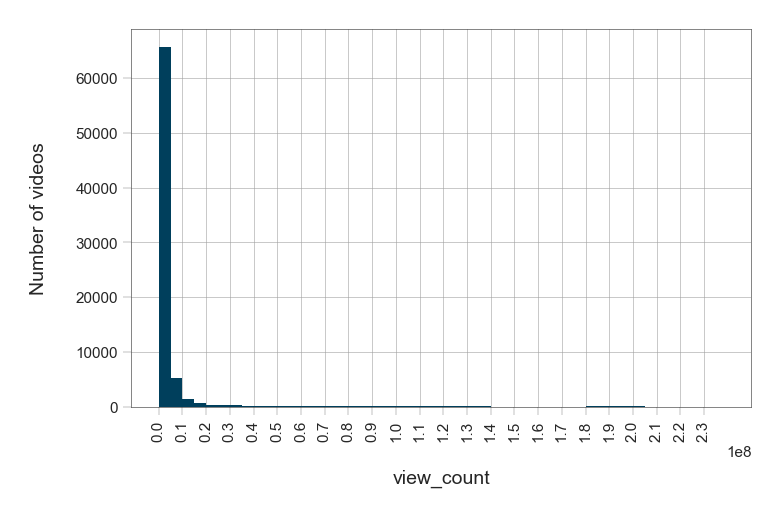

In [15]:
fig, ax = plt.subplots()
_ = sb.distplot(df["view_count"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="view_count", ylabel="Number of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

From this histogram, we can observe the general distribution of what's most of the view count for trending views are. However, we can dig even deeper and how many % of the videos has similar view count.

In [16]:
df[df['view_count'] < 1e6]['view_count'].count() / df['view_count'].count() * 100

46.109801279892224

Using the formula above, we can observe that about 45% of videos have less than a million view.

In [17]:
df[df['view_count'] < 1.5e6]['view_count'].count() / df['view_count'].count() * 100

59.516335466487035

With the same formula, we observed that about 60% which is over half of the trending videos have views less than 1 500 000 views.

In [18]:
df[df['view_count'] < 2.85e6]['view_count'].count() / df['view_count'].count() * 100 - df[df['view_count'] < 2.75e6]['view_count'].count() / df['view_count'].count() * 100

0.8218255304816466

With the mean at about 2 800 000 views, we see that only about 0.8% of the videos fall within +/- 500 000 range of the mean. Thus a median is actually a better tool than median.

Here we will be looking deeper into the likes of trending videos

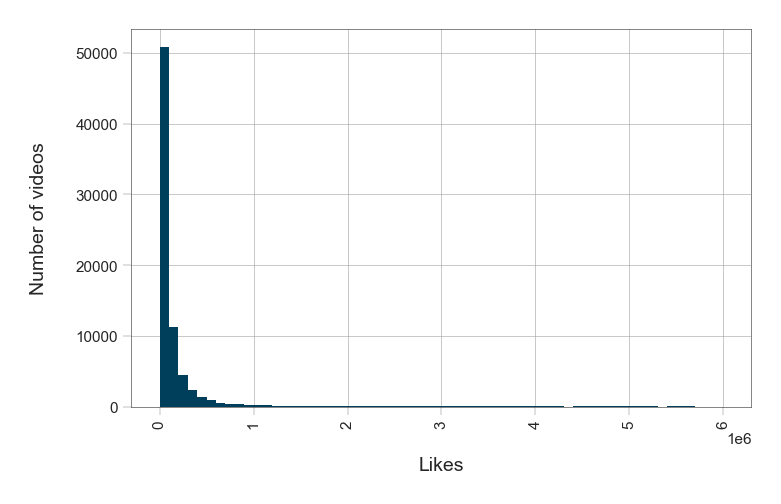

In [19]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sb.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="Number of videos")
_ = plt.xticks(rotation=90)

From the distribution of this graph, we can observe that the data is slightly more evenly distributed than that of views. We will dive deeper and see how the distribution is like.

In [20]:
df[df['likes'] < 151165]['likes'].count() / df['likes'].count() * 100

78.0464802963961

In [21]:
df[df['likes'] < 52328]['likes'].count() / df['likes'].count() * 100

49.999326372516

With the mean at 151 165 likes and median at 52 328 likes, we observe that 50% of data fall below the median and thus the other 50% above the median. For the mean, it covers about 78% of the data which is much better than the mean of the view count.

Here we will be looking deeper into the number of comments of trending videos

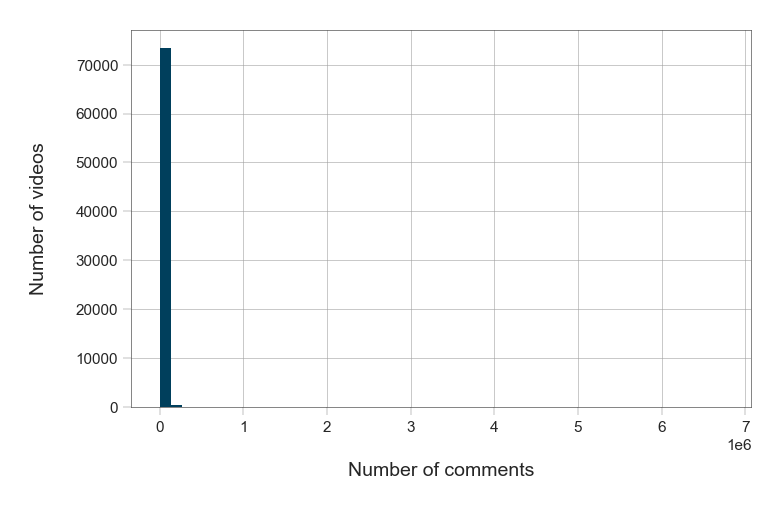

In [22]:
fig, ax = plt.subplots()
_ = sb.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Number of comments", ylabel="Number of videos")

The distribution here is very small and thus it is very difficult for us to observe anything, but we observe that most of the data is below 3 so we will take a deeper look by only observing the entries that are below 300 000.

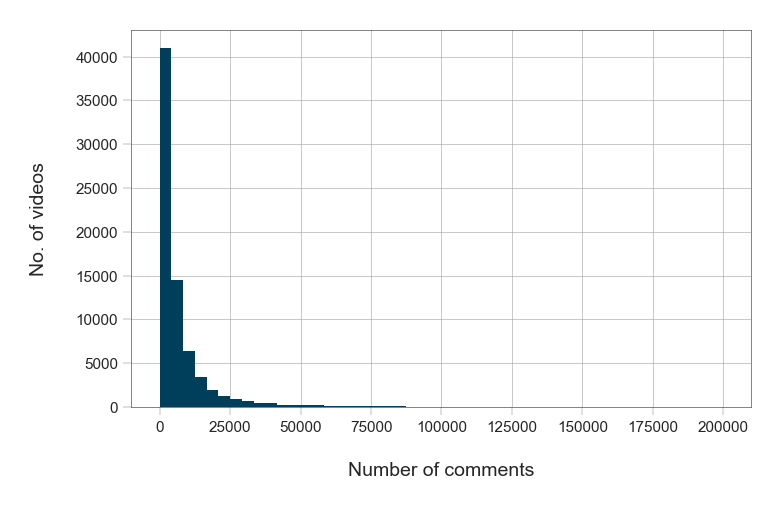

In [23]:
fig, ax = plt.subplots()
_ = sb.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Number of comments", ylabel="No. of videos")

With this new enlarged view, we can now see a better distribution. There is a better trend to observe too where the number of comments are inversely proportionate to the number of videos.

The mean comments of a trending video is 11 614. The median comments is 3 531 which too is much lower than the mean.

In [24]:
df[df['comment_count'] < 11614]['comment_count'].count() / df['comment_count'].count() * 100

81.9575614685079

In [25]:
df[df['comment_count'] < 3531]['comment_count'].count() / df['comment_count'].count() * 100

49.99528460761199

We can see about 80% of the trending videos fall below the mean whereas for the medium, about 50% falls below and the other 50% falls above.

Comparing the dstribution of the number of comments and likes using median and mean, both have similar statistics. However, there are more common span and bots that contribute to the comments than the likes which we are unable to filter out. This will lead to higher inaccuracy in the dataset over the likes dataset. Therefore we will use the number of likes to attempt to model a linear regression against Number of trending videos.

# Does category affect the view?

<AxesSubplot:xlabel='categoryId', ylabel='view_count'>

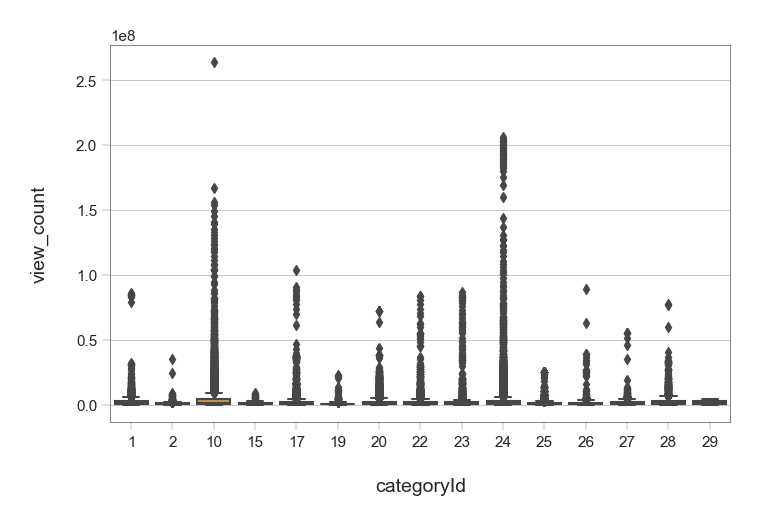

In [26]:
sb.boxplot( x = df['categoryId'], y= df['view_count'])

In [27]:
cleanCat = df

In [28]:
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['categoryId'].map(cat_dict)


### By dropping out the video id, channel id, which doesn't help us much in finding out the trend that we need.
### By extracting the information from the JSON file, we are able to see what each of the categoryId mean

In [29]:
cleanCat.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_name
27796,PKtnafFtfEo,"Youtube Rewind 2020, Thank God It's Over",2021-01-01T21:00:03Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2021-01-02T00:00:00Z,[None],17866867,2862697,19927,224811,https://i.ytimg.com/vi/PKtnafFtfEo/default.jpg,False,False,This is what Youtube Rewind would look like if...,Entertainment
27797,KIK3azN4w34,Justin Bieber - Anyone,2021-01-01T05:00:08Z,UCHkj014U2CQ2Nv0UZeYpE_A,JustinBieberVEVO,10,2021-01-02T00:00:00Z,Justin|Bieber|Anyone|RBMG/Def|Jam|Pop,11013551,782233,21750,63315,https://i.ytimg.com/vi/KIK3azN4w34/default.jpg,False,False,Anyone out now: https://JustinBieber.lnk.to/An...,Music
27798,tXZ0Qq_Nbc0,Jennifer Lopez | New Year's Rockin' Eve Perfor...,2021-01-01T09:00:37Z,UCr8RjWUQ_9KYcIPmWiqBroQ,Jennifer Lopez,10,2021-01-02T00:00:00Z,[None],2060520,34996,6049,5788,https://i.ytimg.com/vi/tXZ0Qq_Nbc0/default.jpg,False,False,Jennifer Lopez | New Year's Rockin' Eve Perfor...,Music
27799,MpJIg_3DnLk,London's 2021 fireworks 🎆 Happy New Year Live!...,2021-01-01T00:13:16Z,UCCj956IF62FbT7Gouszaj9w,BBC,24,2021-01-02T00:00:00Z,fireworks|NYE|new year countdown 2021|firework...,5478680,85416,9242,16876,https://i.ytimg.com/vi/MpJIg_3DnLk/default.jpg,False,False,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,Entertainment
27802,AjhvRX57XkE,Welcome to BREATH - A 30 Day Yoga Journey | ...,2021-01-01T06:00:09Z,UCFKE7WVJfvaHW5q283SxchA,Yoga With Adriene,26,2021-01-02T00:00:00Z,breath|breath yoga|30 days of yoga|30 day yoga...,884345,34736,508,4669,https://i.ytimg.com/vi/AjhvRX57XkE/default.jpg,False,False,It is happening! Today’s video is a bit of an ...,Howto & Style
27803,mviuNd0l680,Phish Dinner And A Rematch Madison Square Gard...,2021-01-01T06:50:44Z,UCDEPOd0RCvw8iSTqFpSBZLA,Phish,10,2021-01-02T00:00:00Z,Phish|LivePhish|Trey Anastasio|Mike Gordon|Jon...,294736,2433,195,194,https://i.ytimg.com/vi/mviuNd0l680/default.jpg,False,False,Exactly 25 years after the audience tied the b...,Music
27804,OK_ChvMo1BQ,Hello 2021 Americas | YouTube NYE Celebration,2021-01-01T03:29:11Z,UCqVDpXKLmKeBU_yyt_QkItQ,YouTube Originals,24,2021-01-02T00:00:00Z,Hello 2021 Americas|Hello 2021|Hello 2021 YouT...,559669,23671,2644,3469,https://i.ytimg.com/vi/OK_ChvMo1BQ/default.jpg,False,False,Celebrate the most anticipated New Year in mod...,Entertainment
27805,9XQ6EZrQYng,Bud Light Seltzer Sessions Presents: New Years...,2021-01-01T07:09:24Z,UC1O6nGbccGhl2akEVaSpKsA,Bud Light,10,2021-01-02T00:00:00Z,[None],279147,7312,382,718,https://i.ytimg.com/vi/9XQ6EZrQYng/default.jpg,False,False,Bud Light Seltzer Sessions presents New Year's...,Music
27813,wxuQfkyHcUs,Celebrate New Year's Eve with Fantasy in the S...,2021-01-01T04:45:04Z,UC1xwwLwm6WSMbUn_Tp597hQ,Disney Parks,19,2021-01-02T00:00:00Z,Disney Fireworks|Disney World Fireworks|Disney...,260438,2782,173,229,https://i.ytimg.com/vi/wxuQfkyHcUs/default.jpg,False,False,Countdown again with us as we revisit the spec...,Travel & Events
27814,9X6hH-Z1Tyw,David Guetta | United at Home - Paris Edition ...,2021-01-01T00:27:24Z,UC1l7wYrva1qCH-wgqcHaaRg,David Guetta,10,2021-01-02T00:00:00Z,david guetta|Paris|new years eve|david guetta ...,1816230,78324,1210,2538,https://i.ytimg.com/vi/9X6hH-Z1Tyw/default.jpg,False,False,DONATE NOW on https://davidguetta.com/donateIn...,Music


### Now we need to find the total number of videos per category 
### By rotating the x axis labels, it is easier to see each category 

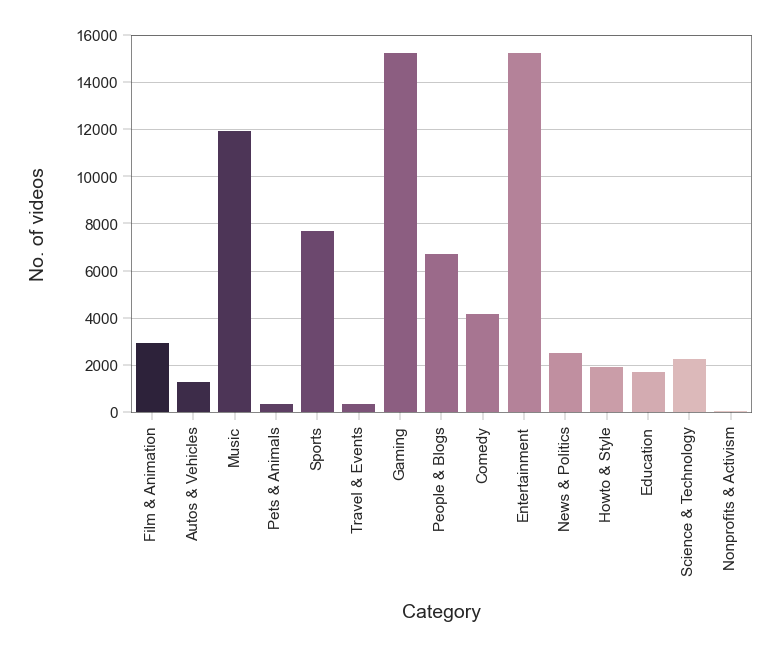

In [30]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sb.barplot(x="category_name", y="No_of_videos", data=cdf, 
        palette=sb.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

### As can be seen from the bar plot, it can be seen that both gaming and entertainment are the two top categories on Youtube that are trending in 2021.

In [31]:
df["publishing_day"] = df["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publishedAt"].apply(lambda x: x[11:13])
df.drop(labels='publishedAt', axis=1, inplace=True)

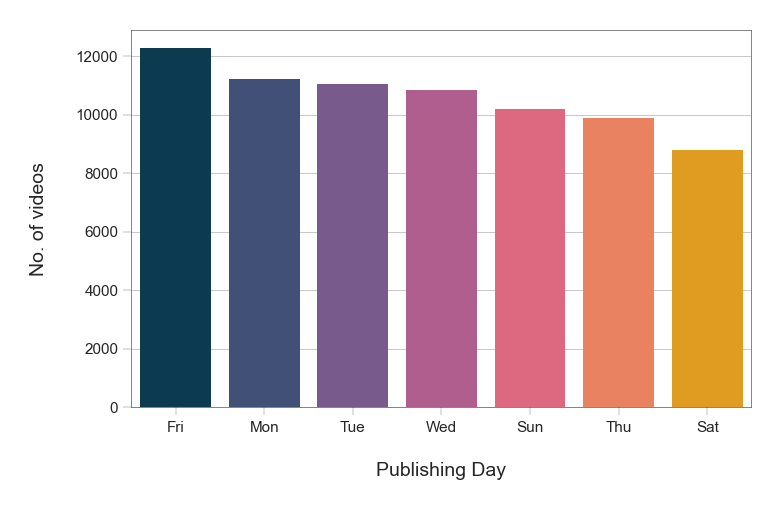

In [32]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sb.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sb.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

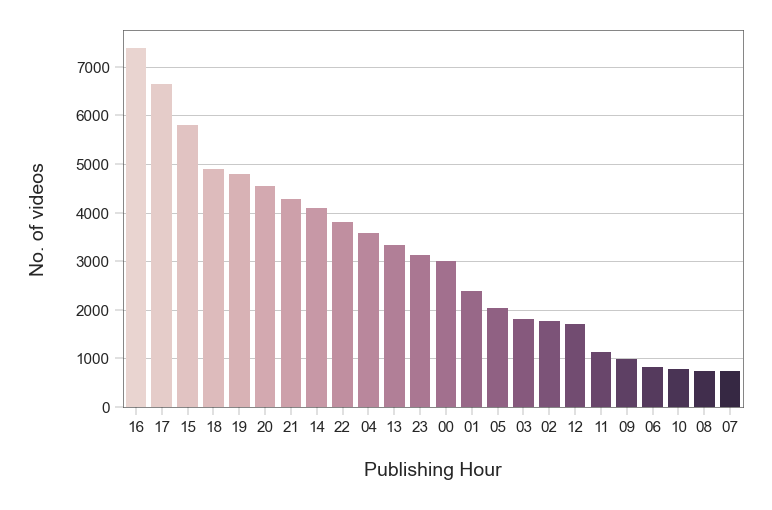

In [33]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sb.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sb.cubehelix_palette(n_colors=25), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

## What insights from data analysis

From the histogram we plotted for number of trending videos against categories. We see distinct differences between different categories, by partitioning them to different categories as the first layer of a classification tree. We can then use different categorical variables for different video categories at subsequent classification tree layers which may be more effective in differentiating trending vs non trending videos for our dataset.

## Partitioning trending dataset to different categories

In [48]:
cdf = df["category_name"].value_counts().to_frame().reset_index()

filmAndAnimation_dataset_trending = cdf[cdf=="Film & Animation"]  
autosAndVehicles_dataset_trending = cdf[cdf=="Autos & Vehicles"]
music_dataset_trending = cdf[cdf=="Music"]
petsAndAnimals_dataset_trending = cdf[cdf=="Pets & Animals"]
sports_dataset_trending = cdf[cdf=="Sports"]
travelAndEvents_dataset_trending = cdf[cdf=="Travel & Events"]
gaming_dataset_trending = cdf[cdf=="Gaming"]
peopleAndBlogs_dataset_trending = cdf[cdf=="People & Blogs"]
comedy_dataset_trending = cdf[cdf=="Comedy"]
entertainment_dataset_trending = cdf[cdf=="Entertainment"]
newsAndPolitics_dataset_trending = cdf[cdf=="News & Politics"]
howtoAndStyle_dataset_trending = cdf[cdf=="Howto & Style"]
education_dataset_trending = cdf[cdf=="Education"]
scienceAndTechnology_dataset_trending = cdf[cdf=="Science & Technology"]
nonprofitsAndActivism_dataset_trending = cdf[cdf=="Nonprofits & Activism"]

# Machine Learning to answer questions
## Predicting View_Count using 3 different  different regression techniques
- Linear Regression
- Random Forest Regression
- XGBoost Regression( Open-Source Regression Technique)

In [ ]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(df['view_count'])
X = pd.DataFrame(df['likes'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 80000,  # CHANGE AND EXPERIMENT
                                 max_depth = 4)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train.likes.ravel(), y_train.view_count.ravel())

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Data analysis for what type of videos it more likely to be trendy

In [ ]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

### Majority of people watch?

In [ ]:
titles_1 = df.loc[df['view_count'] > 10000].sort_values('view_count', ascending=False)['title'][1:].tolist()
words_1 = [word for titles_1 in titles_1 for word in titles_1.split()]


from wordcloud import WordCloud
words_1_joined=(" ").join(words_1)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_1_joined)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

# What people don’t watch 

View count vs tags

In [ ]:
titles_1 = df.loc[df['view_count'] < 5000 ].sort_values('view_count', ascending=False)['title'][1:].tolist()
words_1 = [word for titles_1 in titles_1 for word in titles_1.split()]


from wordcloud import WordCloud
words_1_joined=(" ").join(words_1)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_1_joined)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()